# Causal and Predictive Views and Stress-Testing example
This example is the accompanied code to SSRN ...

The case study pretends that we are in a case before a central bank meeting, and that we are interested in evaluating how our portfolio will perform based on the outcome of the central bank meeting.

In [1]:
import numpy as np
import seaborn as sns
import fortitudo.tech as ft
import matplotlib.pyplot as plt

In [2]:
# Load the simulated time series that follow with this package
time_series = ft.load_time_series()

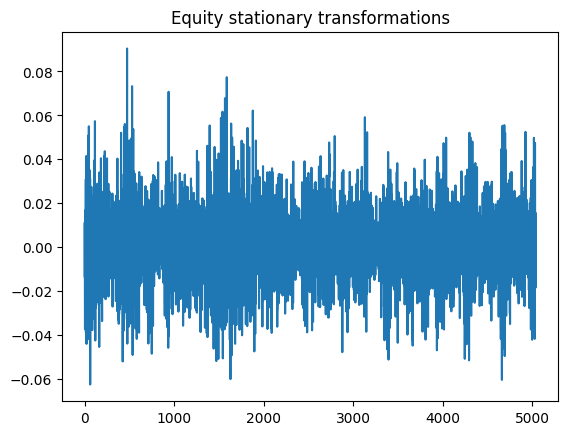

In [3]:
# Compute equity stationary transformations / "invariants"
eqt_log_chg = np.diff(np.log(time_series.iloc[:, 0]))
plt.plot(eqt_log_chg)
plt.title('Equity stationary transformations')
plt.show()

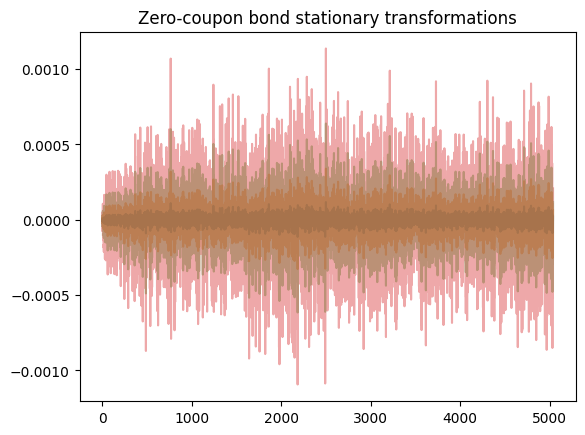

In [4]:
# Compute government bond stationary transformations / "invariants"
zcb_maturities = np.hstack((np.array([1/12, 1/4, 1/2]), np.arange(1, 31)))
zcb_df = np.exp(-time_series.iloc[:, 1:34] / 100 * zcb_maturities)
zcb_log_chg = np.diff(np.log(zcb_df), axis=0)
plt.plot(zcb_log_chg[:, [0, 1, 2, 3]], alpha=0.4)
plt.title('Zero-coupon bond stationary transformations')
plt.show()

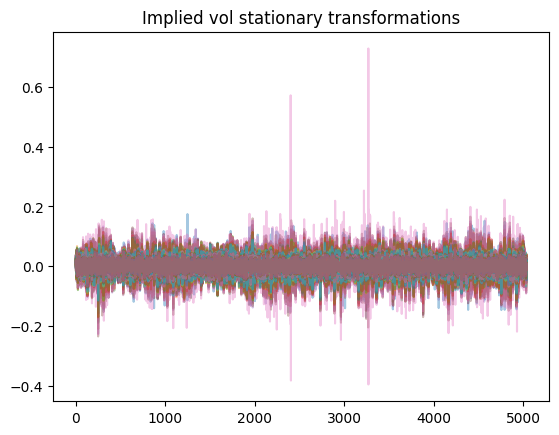

In [5]:
# Compute implied stationary transformations / "invariants"
vol_log_chg = np.diff(np.log(time_series.iloc[:, 34:69]), axis=0)
plt.plot(vol_log_chg, alpha=0.4)
plt.title('Implied vol stationary transformations')
plt.show()

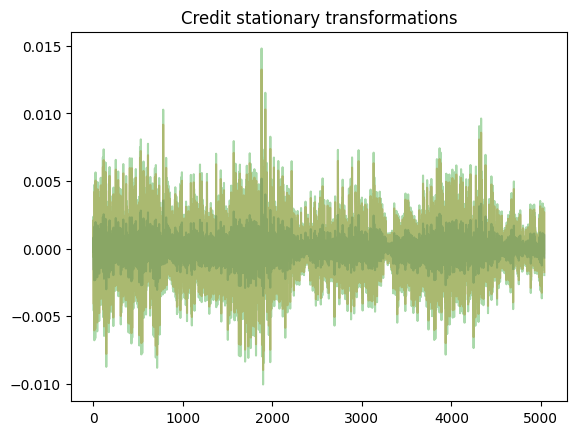

In [6]:
# Compute credit stationary transformations / "invariants"
cr_maturities = np.arange(1, 11)
cr_df = np.exp(-time_series.iloc[:, 69:] / 100 * cr_maturities)
cr_log_chg = np.diff(np.log(cr_df), axis=0)
plt.plot(cr_log_chg[:, [0, 4, 9]], alpha=0.4)
plt.title('Credit stationary transformations')
plt.show()

# Computing the one-step-ahead risk factor distribution
With the stationary transformations at hand, we compute the one-step-ahead distributions for all risk factors by simply using the historical stationary transformations directly. For real-world applications, a more sophisticated simulation engine should be used that would also allow us to project further into the future instead of just one-step-ahead. This is however beyond the scope of this example.

The interested reader can also explore exponentially decaying prior probabilities that are available through the ft.exp_decay_probs function, but this is still a very simple way of modelling the one-step-ahead risk factor distribution.

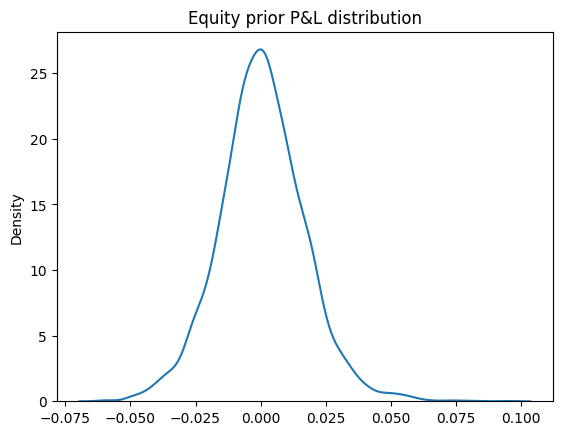

In [7]:
# Prior equity return
eqt_pnl = np.exp(eqt_log_chg) - 1
sns.kdeplot(eqt_pnl)
plt.title('Equity prior P&L distribution')
plt.show()

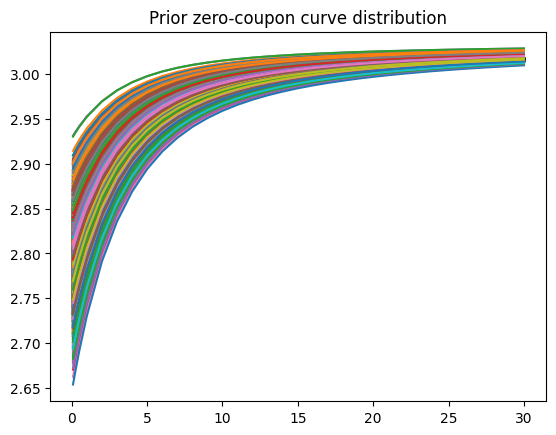

In [8]:
# Prior zero-coupon curve distribution
df_sim = np.exp(zcb_log_chg) * zcb_df.values[-1, :]
zcb_curve_sim = -np.log(df_sim) / zcb_maturities
plt.plot(zcb_maturities, 100 * zcb_curve_sim.T)
plt.title('Prior zero-coupon curve distribution')
plt.show()

In [9]:
# Implied vol surface distribution

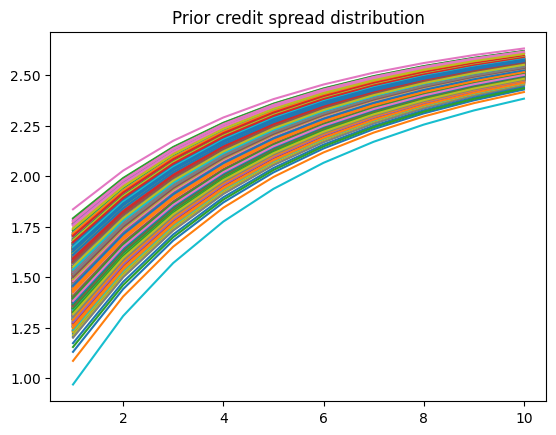

In [10]:
# Prior credit spread distribution
cr_sim = np.exp(cr_log_chg) * cr_df.values[-1, :]
cr_curve_sim = -np.log(cr_sim) / cr_maturities
plt.plot(cr_maturities, 100 * cr_curve_sim.T)
plt.title('Prior credit spread distribution')
plt.show()

# License

In [11]:
# fortitudo.tech - Novel Investment Technologies.
# Copyright (C) 2021-2023 Fortitudo Technologies.

# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <https://www.gnu.org/licenses/>.